<a href="https://colab.research.google.com/github/rvaidya2-ksu/IT7103/blob/main/IT7103_Assignment4_rvaidya2(target_Str).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*  IT 7103
*  Assignment 4
*  Rajshree Vaidya






**Loading Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [58]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
data.head()

,ID,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0


In [59]:
data.shape

(699, 11)

In [60]:
data.dtypes

ID                            int64
ClumpThickness                int64
UniformityOfCellSize          int64
UniformityOfCellShape         int64
MarginalAdhesion              int64
SingleEpithelialCellSize      int64
BareNuclei                    int64
BlandChromatin                int64
NormalNucleoli                int64
Mitoses                       int64
Class                       float64
dtype: object

Changing the data type of target variable to String/Object.

In [61]:
data['Class']= data['Class'].astype(str)

In [62]:
data['Class'].dtype

dtype('O')

**SPLITTING THE DATA INTO TRAINING AND TESTING**

In [63]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(data, test_size=0.2) #test_size=0.2 means that 20% of data will be for testing, 80% for training

traindata.shape, testdata.shape

((559, 11), (140, 11))

In [64]:
traindata.head()

,ID,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
120,1174057,1,1,2,2,2,1,3,1,1,0.0
326,752904,10,1,1,1,2,10,5,4,1,1.0
495,1170945,3,1,1,1,1,1,2,1,1,0.0
148,1187457,3,1,1,3,8,1,5,8,1,0.0
661,1339781,4,1,1,1,2,1,3,1,1,0.0


In [65]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols.remove('ID')
num_cols

['ClumpThickness',
 'UniformityOfCellSize',
 'UniformityOfCellShape',
 'MarginalAdhesion',
 'SingleEpithelialCellSize',
 'BareNuclei',
 'BlandChromatin',
 'NormalNucleoli',
 'Mitoses']

In [66]:
num_cols= ['ClumpThickness', 'UniformityOfCellSize', 'UniformityOfCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses']
target= ['Class']

In [67]:
from matplotlib import pyplot as plt

#create some instances
X = np.array([
    [1,2], [1.5,3], [2,2], [1.41,2.41], [1,3], [1,4], [1.6,4.5], [2.5,3.2], [1.5,3.5], [1.7,2],
    [2.2,3.2], [2,5], [2.5,2.5], [2.6,3.2], [2.1,3.5], [2.5,4], [1.4,4.5], [2,4], [2.5,3], [2.5,5]
])

Y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

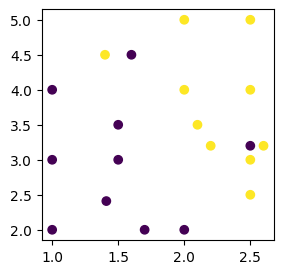

In [68]:
#and visualize them
#horizontal and vertical axes represent the two features
#colors represents the two classes
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

**Using Pipelines and Models**

**1. Linear Support Vector Machine Pipeline**

In [69]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
target= 'Class'

lsvc = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="linear", C=1000))
])
lsvc.fit(traindata, traindata[target])

#lsvc = SVC(C=1000, kernel='linear')
#lsvc.fit(X,Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=1000, kernel='linear'))])

**Fine tuning the model Linear SVM**

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = [
    {'svc__kernel':['linear'],
     'svc__C' : [0.001, 0.1, 1, 10, 100, 1000]}

]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(traindata,traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['ClumpThickness',
                                                                          'UniformityOfCellSize',
                                                                          'UniformityOfCellShape',
                                                                          'MarginalAdhesion',
                                                                          'SingleEpithelialCellSize',
                                                                          'BareNuclei',
                                                                          'BlandChromatin',
                                                                          'NormalNucleoli',
                                                                          'Mitoses'])])),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.001, 0.1, 1, 10, 100, 1000],
                          'svc__kernel': ['linear']}],
             return_train_score=True, scoring='accuracy')

In [97]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['ClumpThickness',
                                                   'UniformityOfCellSize',
                                                   'UniformityOfCellShape',
                                                   'MarginalAdhesion',
                                                   'SingleEpithelialCellSize',
                                                   'BareNuclei',
                                                   'BlandChromatin',
                                                   'NormalNucleoli',
                                                   'Mitoses'])])),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [98]:
grid_search.best_score_

0.9660714285714287

In [99]:
grid_search.score(testdata, testdata[target])

0.9571428571428572

In [100]:
lsvc_pred = lsvc.predict(traindata)

Training Accuracy

In [101]:
from sklearn.metrics import accuracy_score, f1_score
print('accuracy:', accuracy_score(traindata[target], lsvc_pred))
print('f1 score:', f1_score(traindata[target], lsvc_pred, pos_label='1.0'))

accuracy: 1.0
f1 score: 1.0


In [102]:
lsvc_pred_test = lsvc.predict(testdata)


Testing Accuracy

In [103]:
print('accuracy:', accuracy_score(testdata[target], lsvc_pred_test))
print('f1 score:', f1_score(testdata[target], lsvc_pred_test, pos_label='1.0'))

accuracy: 1.0
f1 score: 1.0


**2. Kernel Support Vector Machine (linear and rbf)**

In [83]:
from sklearn.pipeline import Pipeline
#from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    #('impute', KNNImputer()),
    ('standardize', StandardScaler())
])

processing_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
])

In [84]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardize',
                                                  StandardScaler())]),
                                 ['ClumpThickness', 'UniformityOfCellSize',
                                  'UniformityOfCellShape', 'MarginalAdhesion',
                                  'SingleEpithelialCellSize', 'BareNuclei',
                                  'BlandChromatin', 'NormalNucleoli',
                                  'Mitoses'])])

In [85]:
from sklearn.svm import SVC

svc = Pipeline([
    ('processing', processing_pipeline),
    ('svc', SVC())
])
svc.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['ClumpThickness',
                                                   'UniformityOfCellSize',
                                                   'UniformityOfCellShape',
                                                   'MarginalAdhesion',
                                                   'SingleEpithelialCellSize',
                                                   'BareNuclei',
                                                   'BlandChromatin',
                                                   'NormalNucleoli',
                                                   'Mitoses'])])),
                ('svc', SVC())])

In [86]:
svc.predict(traindata)

array(['0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0',
       '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0',
       '0.0', '1.0', '1.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0',
       '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0',
       '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0',
       '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '0.0', '0.0',
       '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0',
       '0.0', '0.0',

**Fine Tuning the Kernel model**

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = [
    {'svc__kernel':['linear'],
     'svc__C' : [0.001, 0.1, 1, 10, 100]},

    {'svc__kernel':['rbf'],
     'svc__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
     'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100]}
]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(traindata,traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['ClumpThickness',
                                                                          'UniformityOfCellSize',
                                                                          'UniformityOfCellShape',
                                                                          'MarginalAdhesion',
                                                                          'SingleEpithelialCellSize',
                                                                          'BareNuclei',
                                                                          'BlandChromatin',
                                                                          'NormalNucleoli',
                                                                          'Mitoses'])])),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.001, 0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [89]:
grid_search.best_score_


0.9714285714285713

In [92]:
grid_search.score(testdata, testdata[target])

0.9357142857142857

In [91]:
svc_pred = lsvc.predict(traindata)

Training Accuracy

In [93]:
from sklearn.metrics import accuracy_score, f1_score
print('accuracy:', accuracy_score(traindata[target], svc_pred))
print('f1 score:', f1_score(traindata[target], svc_pred, pos_label='1.0'))

accuracy: 1.0
f1 score: 1.0


In [94]:
svc_pred_test = lsvc.predict(testdata)


Testing Accuracy

In [95]:
print('accuracy:', accuracy_score(testdata[target], svc_pred_test))
print('f1 score:', f1_score(testdata[target], svc_pred_test, pos_label='1.0'))

accuracy: 1.0
f1 score: 1.0


Training and testing Accuracy for both models:


1.   Linear SVM
*   Training Accuracy: 1.0
*   Testing Accuracy: 1.0

2.   Kernel SVM
*   Training Accuracy: 1.0
*   Testing Accuracy: 1.0
